In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import re
from ames_preprocessing import restrict_col_list, get_clean_ames

# Import and clean

In [2]:
data = pd.read_csv('data/Ames_Housing_Price_Data.csv', index_col = 0).drop_duplicates().reset_index(drop = True)

## Manual adjustments

In [3]:
housing = data.copy()

#Do not appear to be legit garages; remove
housing.at[531,'GarageType'] = np.nan
housing.at[531,'GarageCars'] = np.nan
housing.at[531,'GarageArea'] = 0
housing.at[433, 'GarageType'] = np.nan

#Fill using known basement finish type
housing.at[2433, 'BsmtFinType2'] = housing.at[2433, 'BsmtFinType1']

#Fill missing exposure & electrical with most frequently occuring
housing.at[813, 'BsmtExposure'] = 'No'
housing.at[1201, 'BsmtExposure'] = 'No'
housing.at[2441, 'Electrical'] = 'SBrkr'

#Fix remodel year which makes no sense
housing.at[2033, 'YearRemodAdd'] = housing.at[2033, 'YearBuilt']

## Run cleaner

In [4]:
data_dict = get_clean_ames(housing)

In [5]:
housing = data_dict['housing']
areas = data_dict['areas']
frontage = data_dict['frontage']
miscval = data_dict['miscval']
conditions = data_dict['conditions']
inspect10pt = data_dict['inspect10pt']
inspect5pt = data_dict['inspect5pt']
inspections = data_dict['inspections']
dates = data_dict['dates']
counts = data_dict['counts']
other_cats = data_dict['categoricals']
categoricals = other_cats+conditions+inspections

# EDA

In [10]:
categoricals

['MSSubClass',
 'MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'CentralAir',
 'Electrical',
 'Functional',
 'GarageType',
 'GarageFinish',
 'PavedDrive',
 'Fence',
 'MiscFeature',
 'SaleType',
 'Condition1',
 'Condition2',
 'SaleCondition',
 'OverallQual',
 'OverallCond',
 'ExterQual',
 'ExterCond',
 'HeatingQC',
 'KitchenQual']

## MS Class

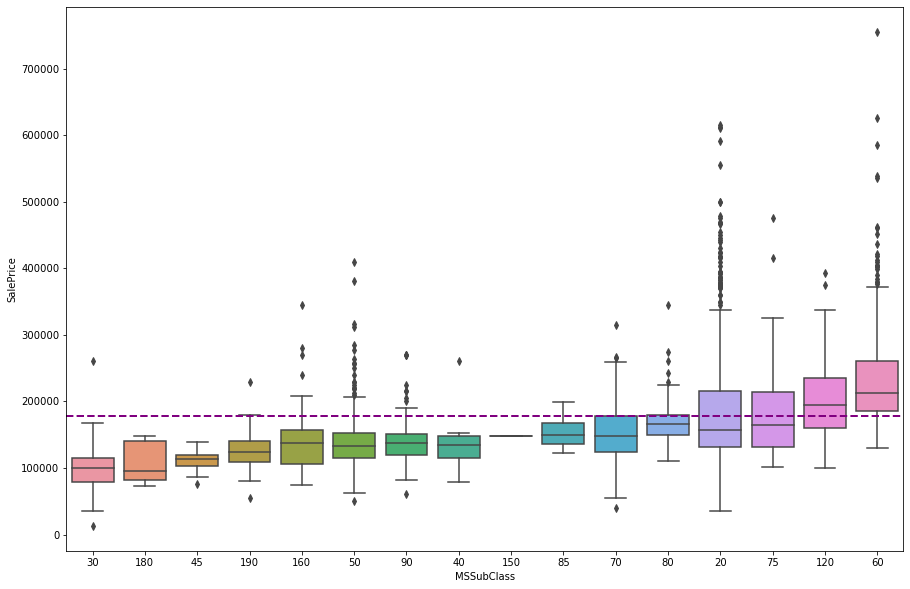

In [87]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('MSSubClass')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'MSSubClass', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

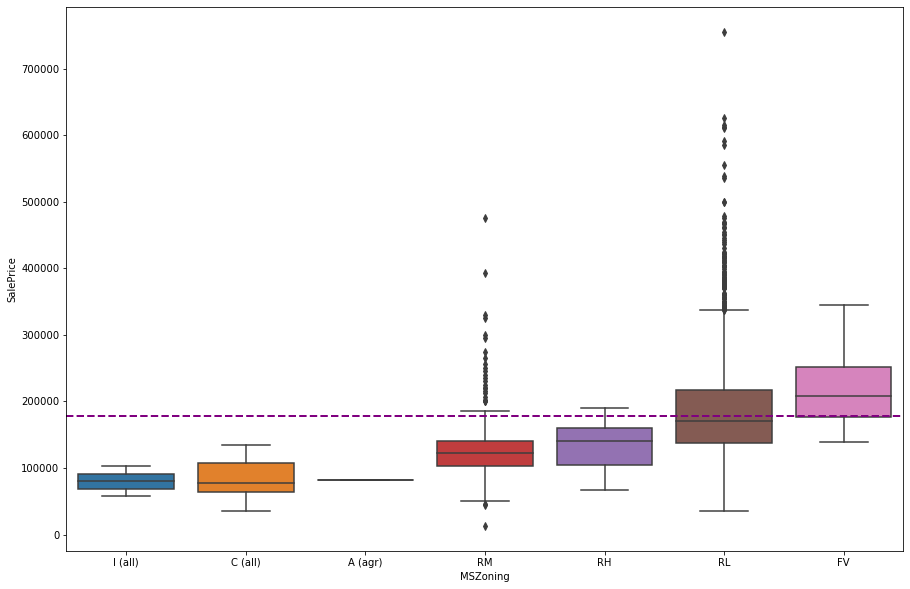

In [86]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('MSZoning')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'MSZoning', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [88]:
housing['zoningGroups'] = housing.MSZoning.apply(lambda x:
                                                'neg_zone' if x in ['I (all)', 'C (all)', 'A (agr)'] else(
                                                'low_R' if x in ['RM', 'RH'] else (
                                                'norm_R' if x in ['RL'] else (
                                                'pos_zone' if x in ['FV'] else
                                                x))))

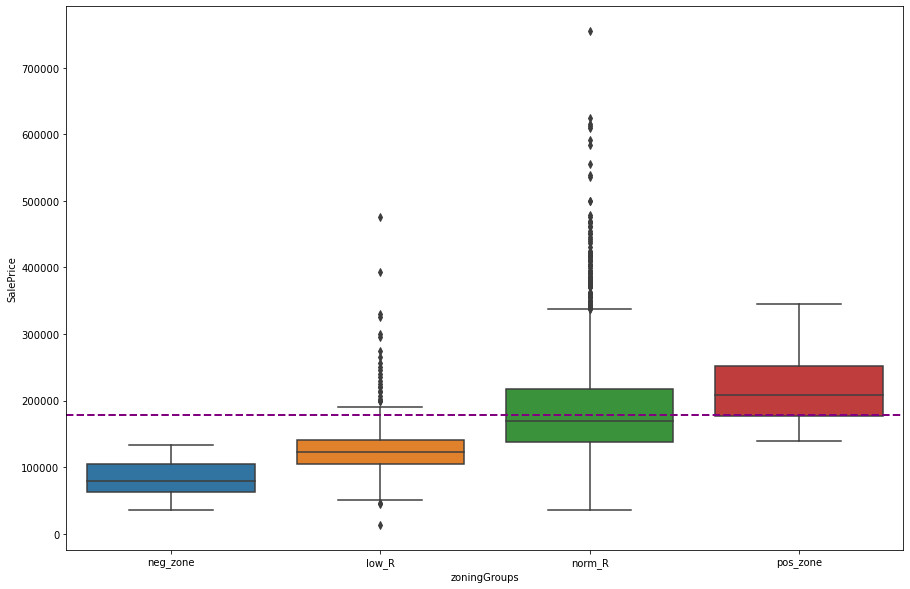

In [89]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('zoningGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'zoningGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Street and alley

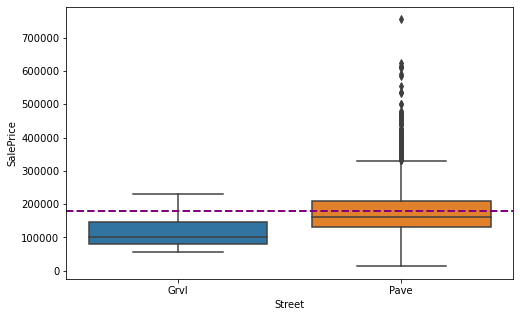

In [90]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('Street')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Street', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

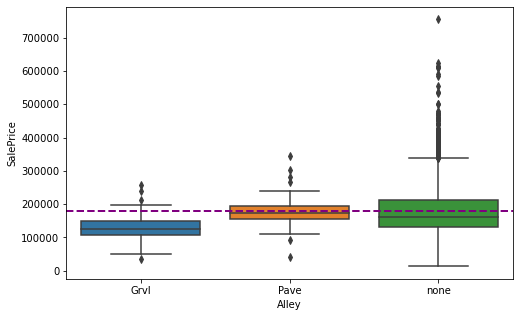

In [91]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('Alley')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Alley', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## LotShape

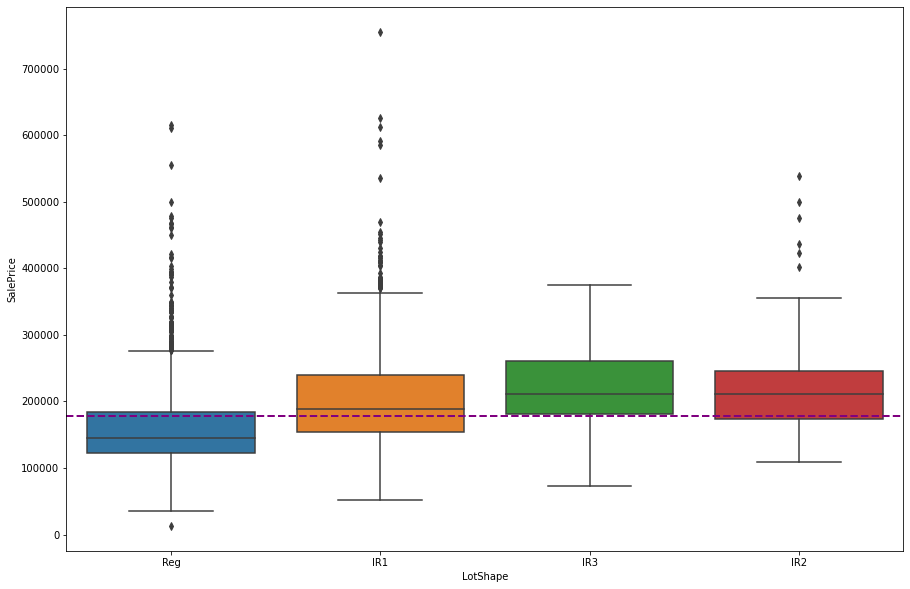

In [58]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('LotShape')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'LotShape', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [59]:
housing['LotShapeGroups'] = housing.LotShape.apply(lambda x: 'IR' if re.search('IR', x) else x)

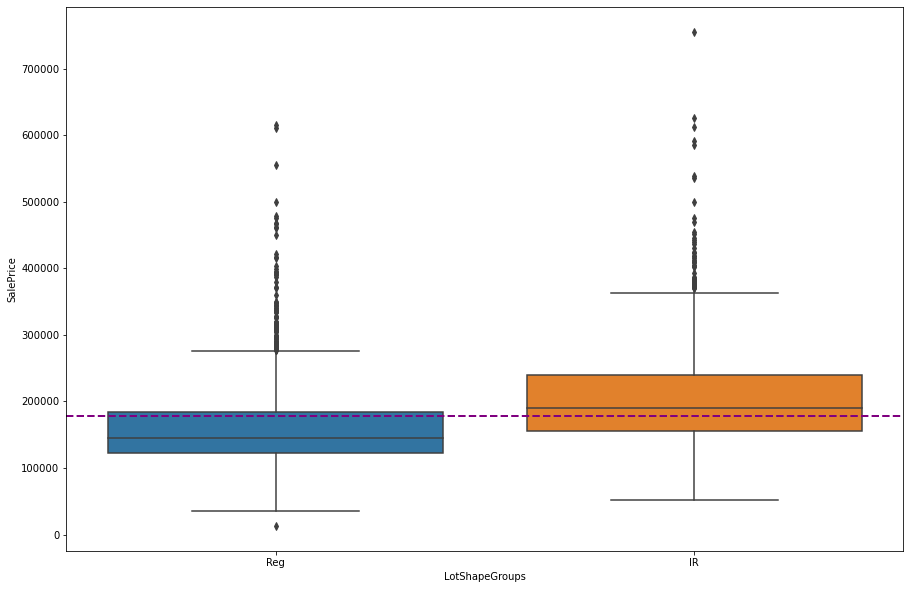

In [60]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('LotShapeGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'LotShapeGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Land Contour

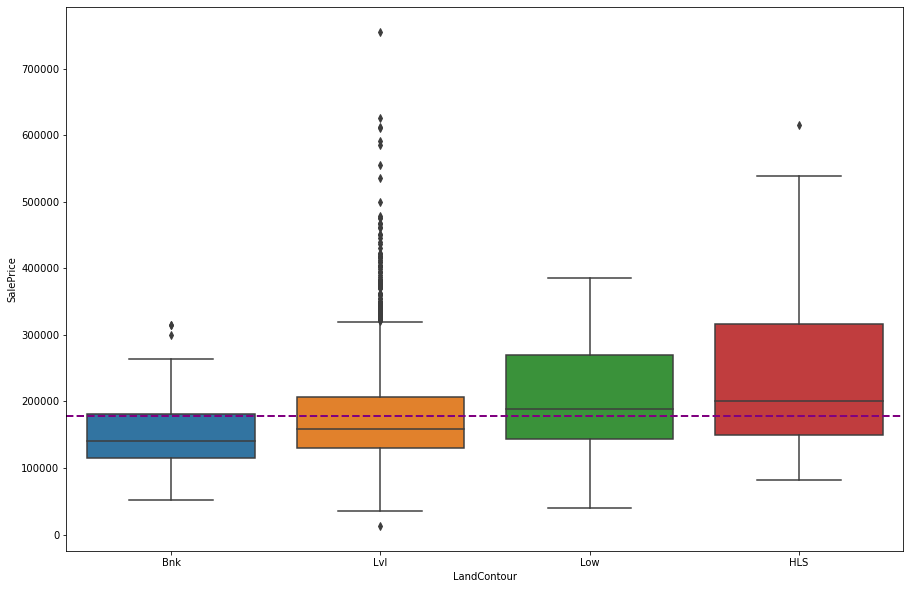

In [61]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('LandContour')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'LandContour', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Utilities

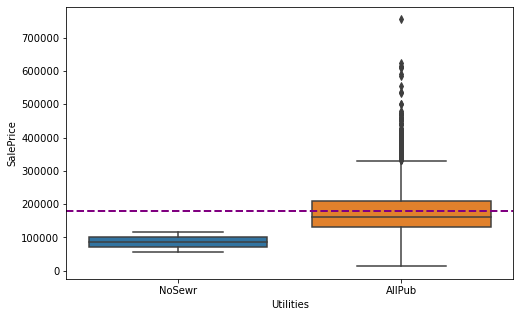

In [92]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('Utilities')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Utilities', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Lot Configuration

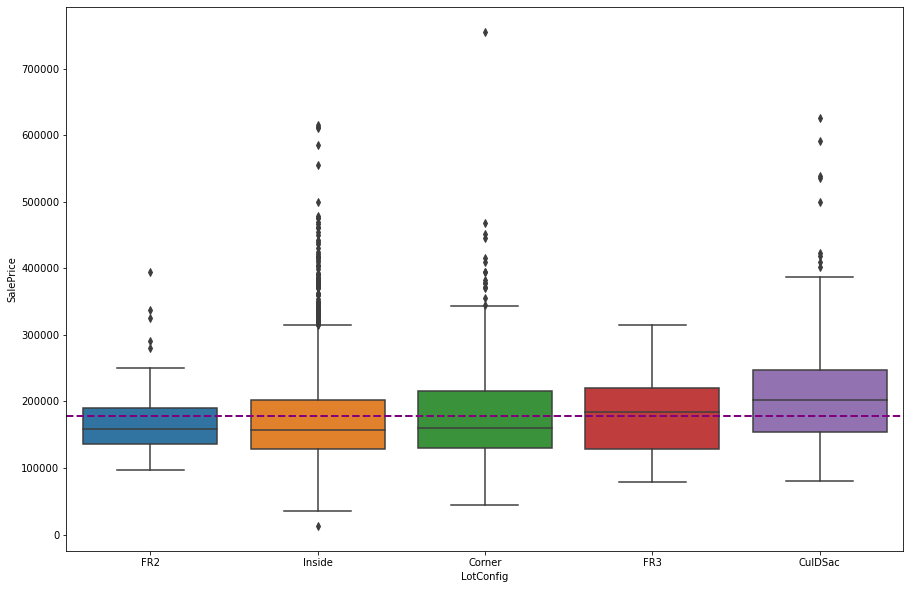

In [62]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('LotConfig')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'LotConfig', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [63]:
#Seems uninformative, drop
housing.drop('LotConfig', axis = 1, inplace = True)
categoricals = restrict_col_list(categoricals, housing)

## Land Slope

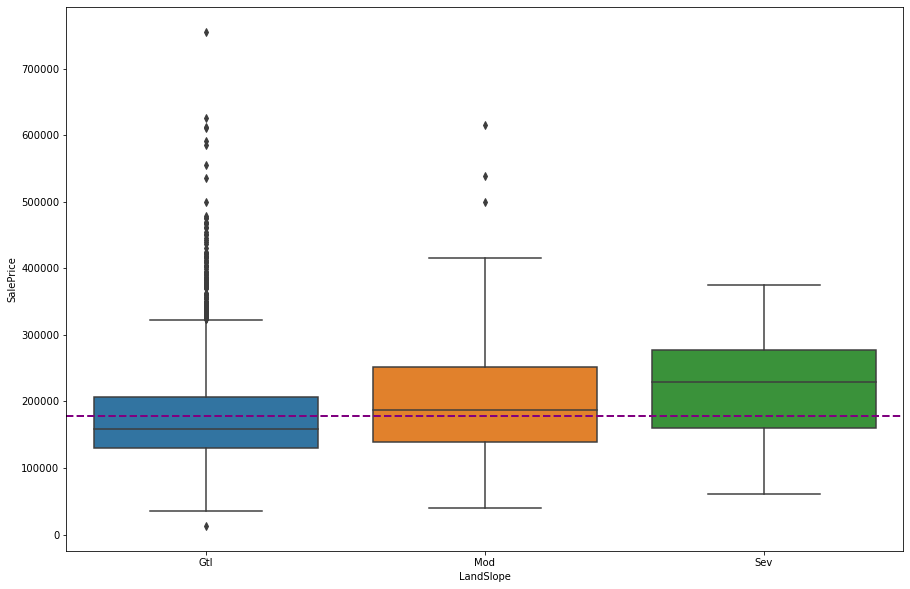

In [93]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('LandSlope')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'LandSlope', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Building type

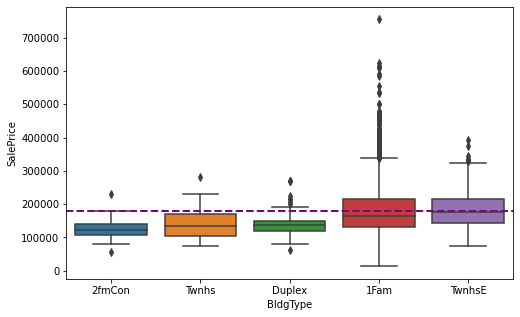

In [78]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('BldgType')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'BldgType', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## House style

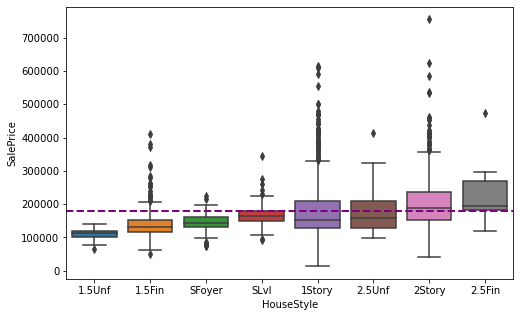

In [94]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('HouseStyle')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'HouseStyle', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [96]:
housing['styleGroups'] = housing.HouseStyle.apply(lambda x:
                                                 'neg_styles' if x in ['1.5Unf', '1.5Fin', 'SFoyer'] else(
                                                 'norm_styles' if x in ['SLvl', '1Story'] else (
                                                 'pos_styles' if x in ['2.5Unf', '2Story','2.5Fin'] else
                                                 x)))

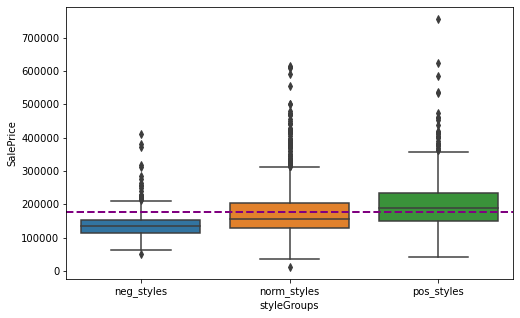

In [97]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('styleGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'styleGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Rooves

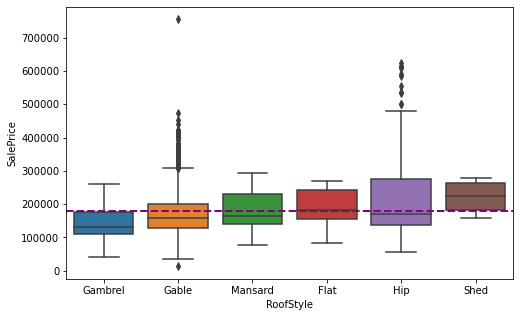

In [98]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('RoofStyle')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'RoofStyle', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

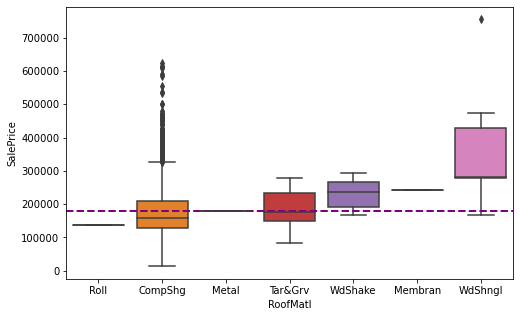

In [99]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('RoofMatl')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'RoofMatl', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Masonry/veneer/exterior

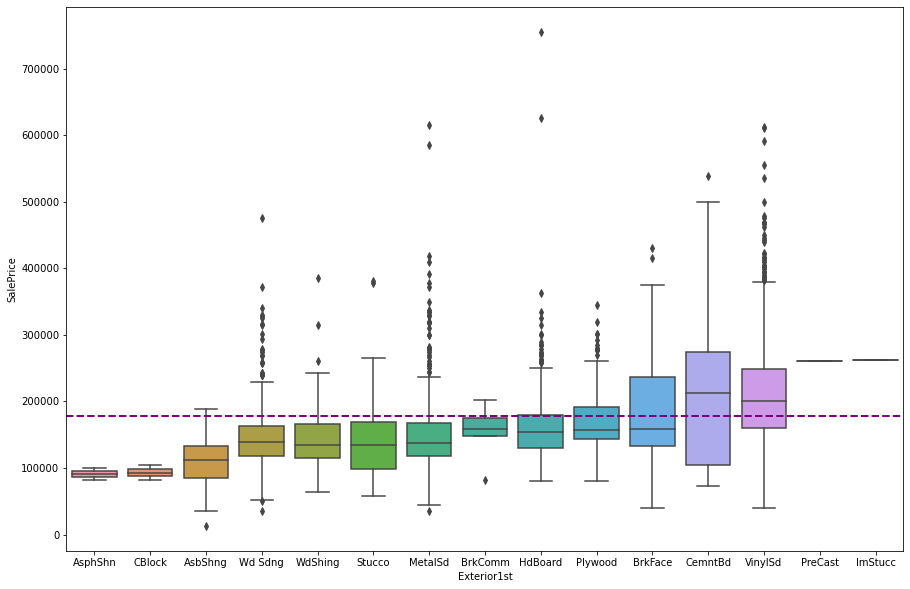

In [73]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Exterior1st')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Exterior1st', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

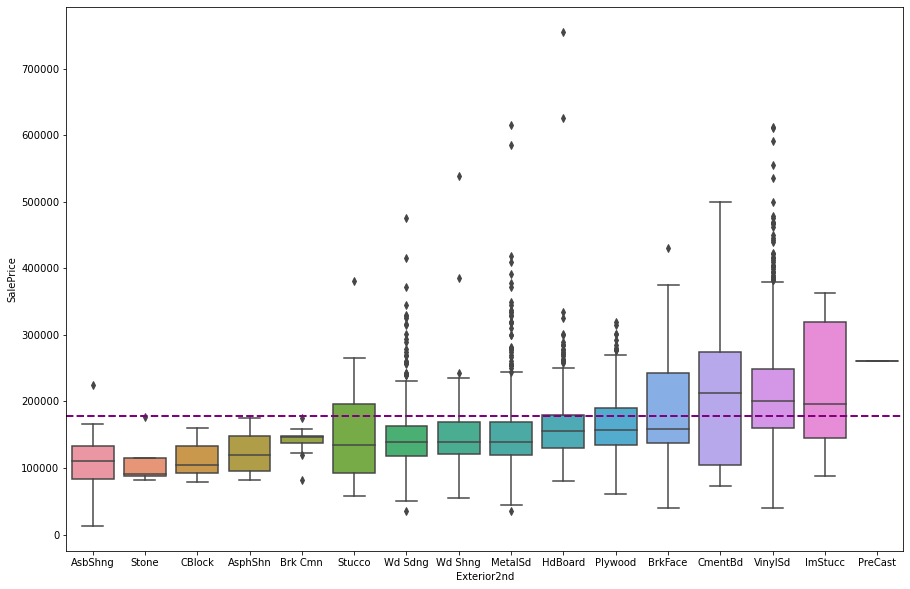

In [72]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Exterior2nd')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Exterior2nd', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [40]:
def compress_exterior(x):
    if x in ['MetalSd', 'Wd Sdng', 'Wd Shng', 'Wd Shing', 'Stucco', 'WdShing']:
        return 'sd_shng'
    elif x in ['CBlock', 'AsphShn', 'Stone']:
        return 'rock'
    elif x in ['HdBoard', 'Plywood']:
        return 'board'
    elif x in ['ImStucc', 'PreCast']:
        return 'fabricated'
    elif x in ['Brk Cmn', 'BrkFace', 'BrkComm']:
        return 'brick'
    elif x == 'AsbShng':
        return 'asb'
    elif x in ['CemntBd', 'CmentBd']:
        return 'cement'
    elif x == 'VinylSd':
        return 'vinyl'
    
    #List above should be exhaustive
    else:
        return x

In [41]:
housing['ext1groups'] = housing.Exterior1st.apply(compress_exterior)
housing['ext2groups'] = housing.Exterior2nd.apply(compress_exterior)

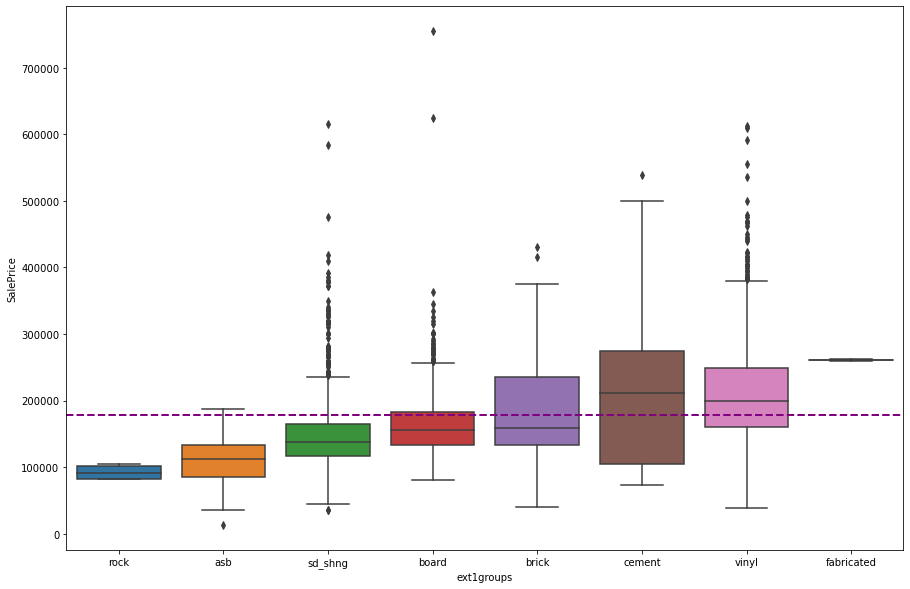

In [42]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('ext1groups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'ext1groups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

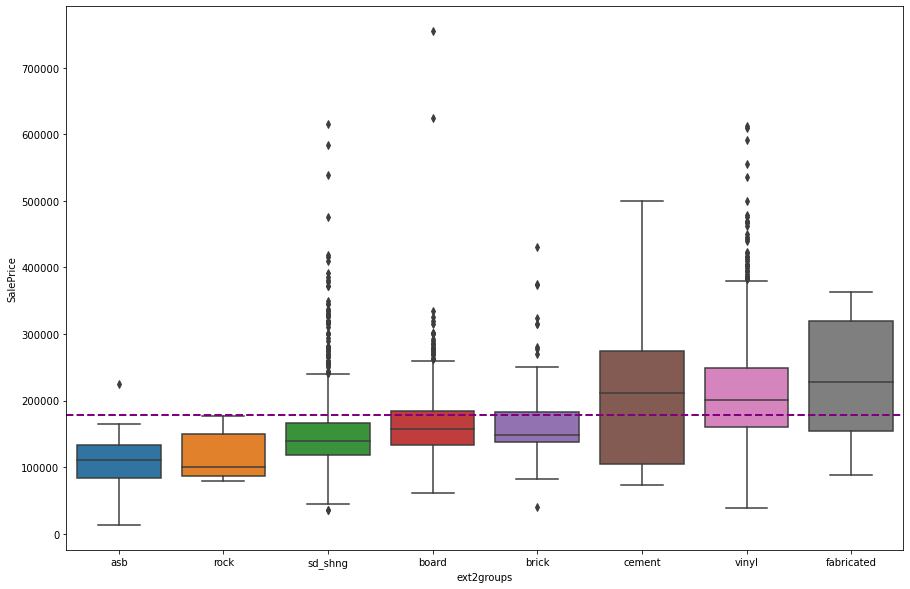

In [43]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('ext2groups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'ext2groups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

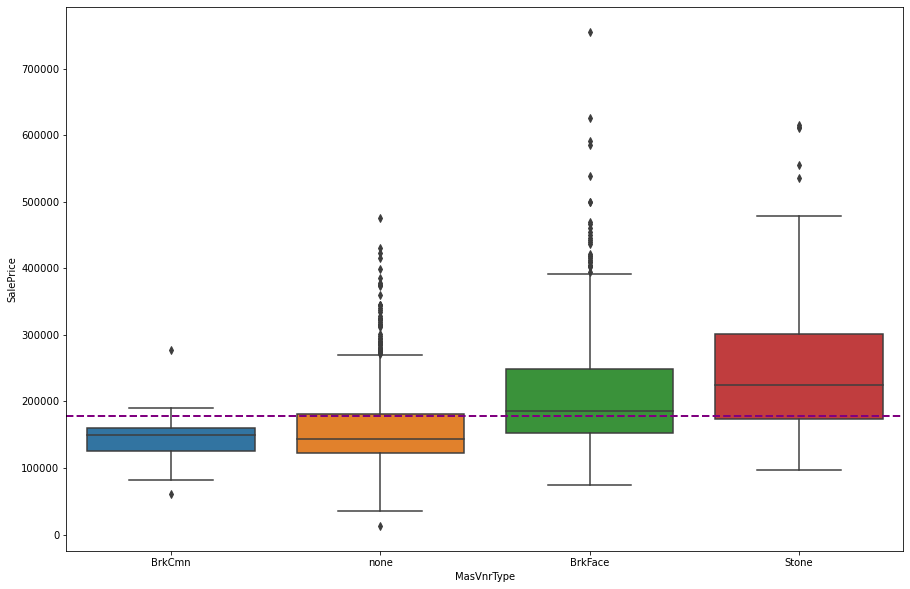

In [37]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('MasVnrType')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'MasVnrType', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Foundation

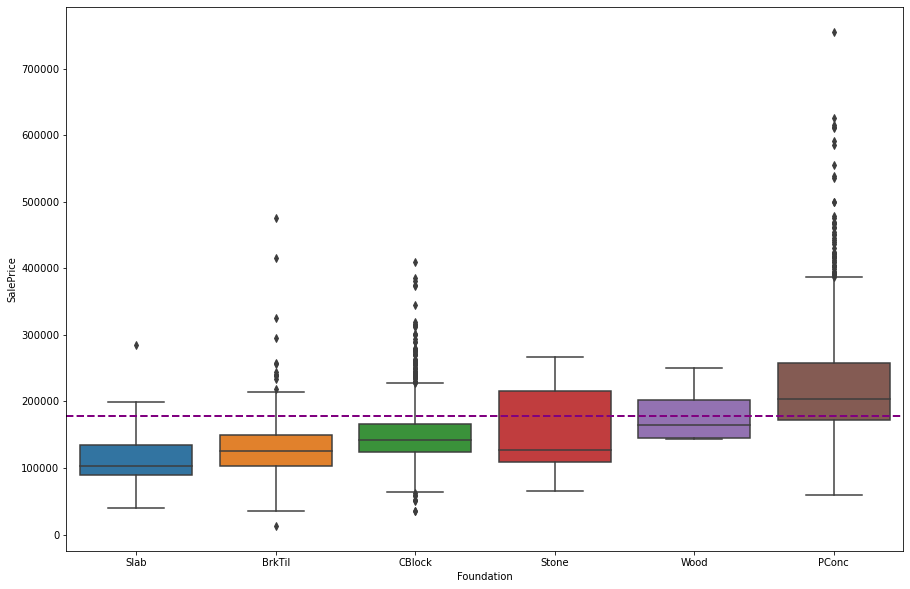

In [44]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Foundation')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Foundation', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [56]:
housing['foundationGroups'] = housing.Foundation.apply(lambda x: 'neg_foundation' if x in ['Slab', 'BrkTil', 'CBlock']
                                                                  else ('avg_foundation' if x in ['Stone', 'Wood']
                                                                        else ('pos_foundation' if x in ['PConc']
                                                                              else x)))

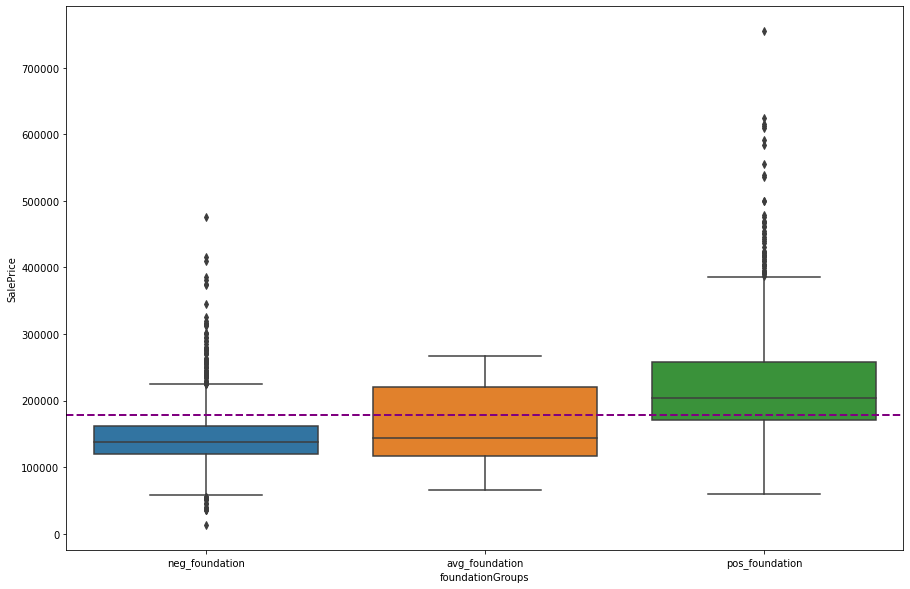

In [57]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('foundationGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'foundationGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Basement categoricals

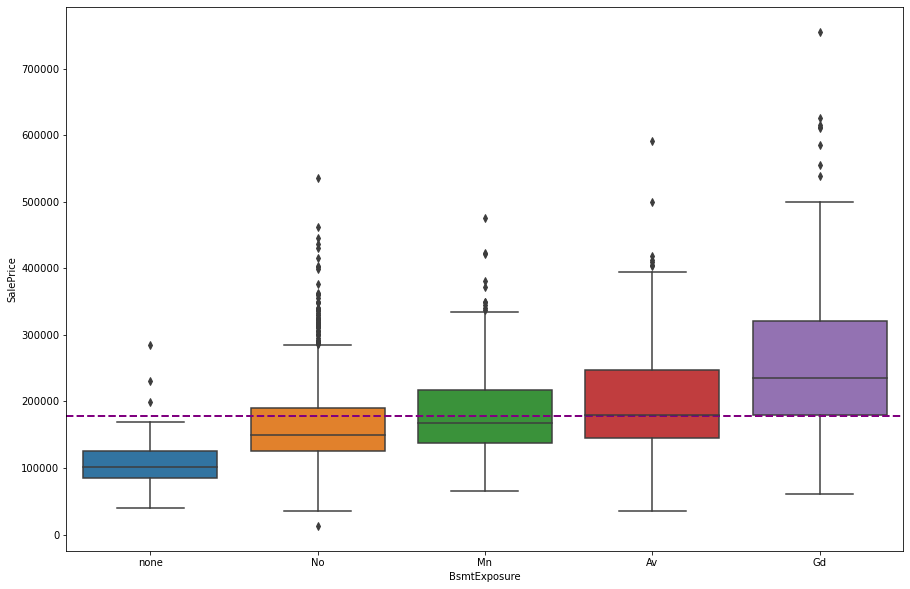

In [100]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('BsmtExposure')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'BsmtExposure', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [101]:
housing['BsmtExpGroups'] = housing.BsmtExposure.apply(lambda x: 'norm' if x in ['No', 'Mn', 'Av'] else x)

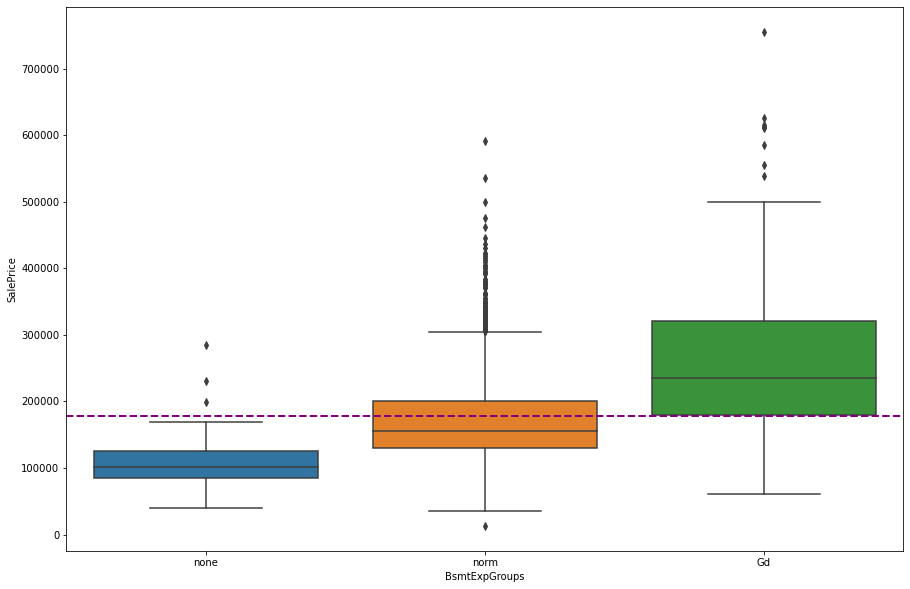

In [102]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('BsmtExpGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'BsmtExpGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

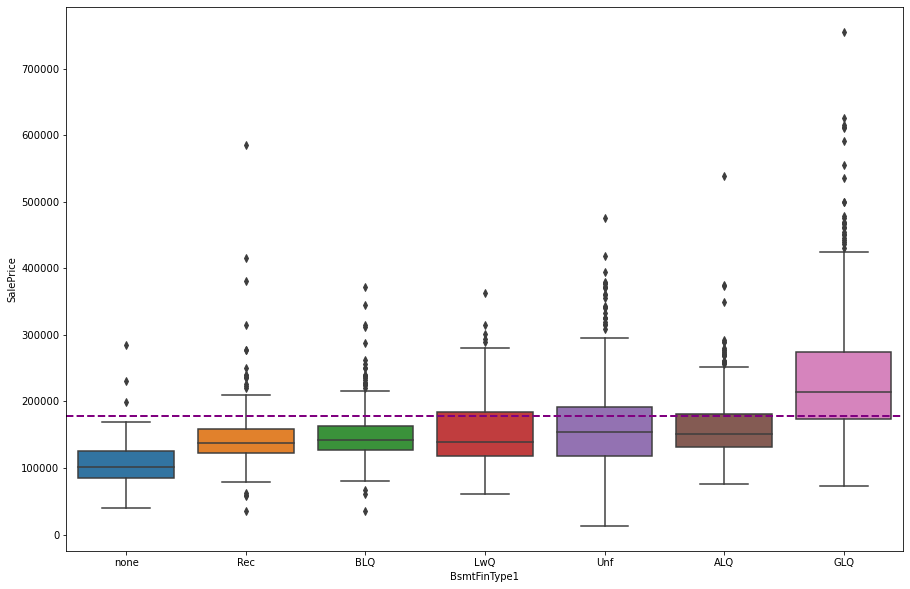

In [103]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('BsmtFinType1')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'BsmtFinType1', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

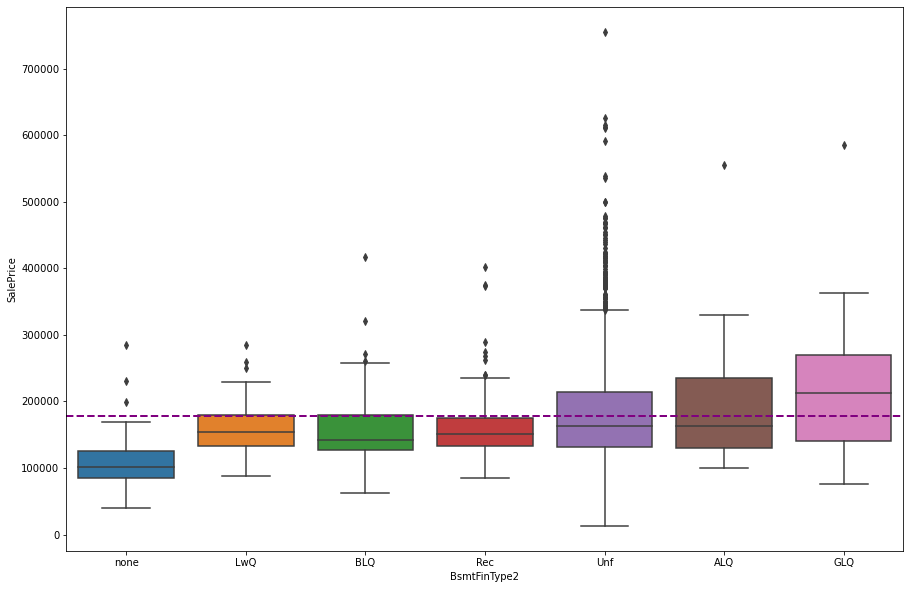

In [104]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('BsmtFinType2')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'BsmtFinType2', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [105]:
def basement_type(x):
    if x in ['LwQ', 'BLQ', 'Rec', 'Unf']:
        return 'unfinished'
    if x in ['ALQ', 'GLQ']:
        return 'finished'
    if x in ['none']:
        return 'none'
    
    #should be exhaustive
    else:
        x

In [108]:
housing['Bsmt1typeGroups'] = housing.BsmtFinType1.apply(basement_type)
housing['Bsmt2typeGroups'] = housing.BsmtFinType2.apply(basement_type)

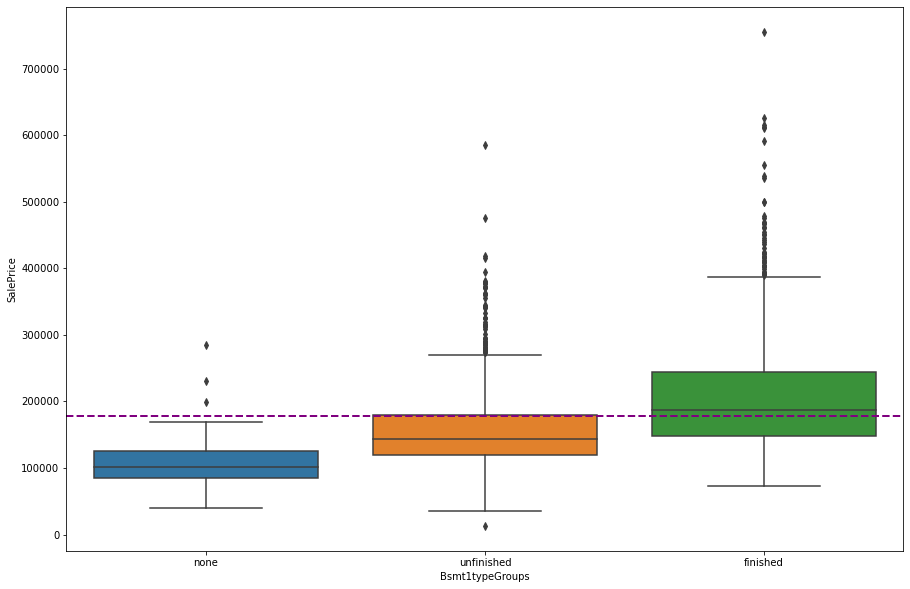

In [107]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Bsmt1typeGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Bsmt1typeGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

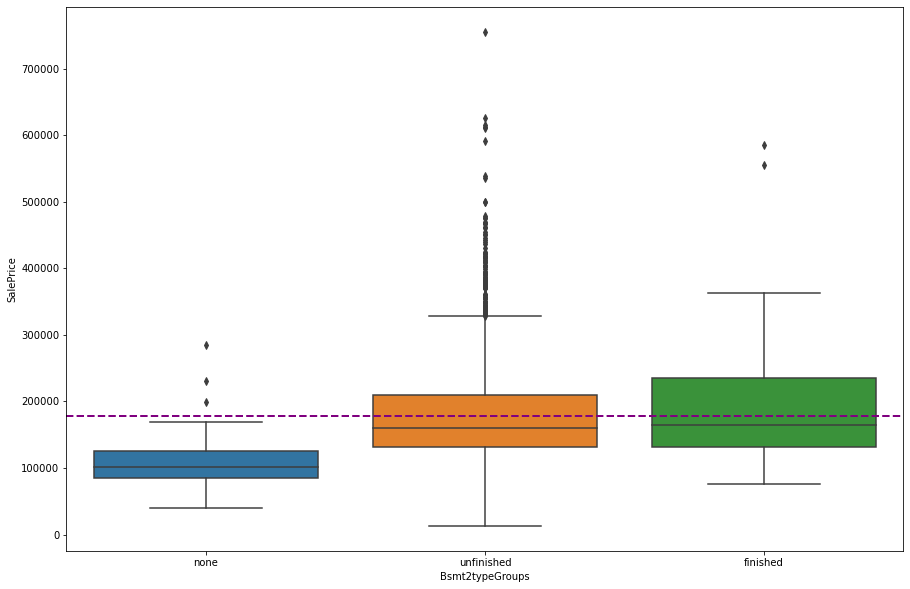

In [109]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Bsmt2typeGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Bsmt2typeGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Air

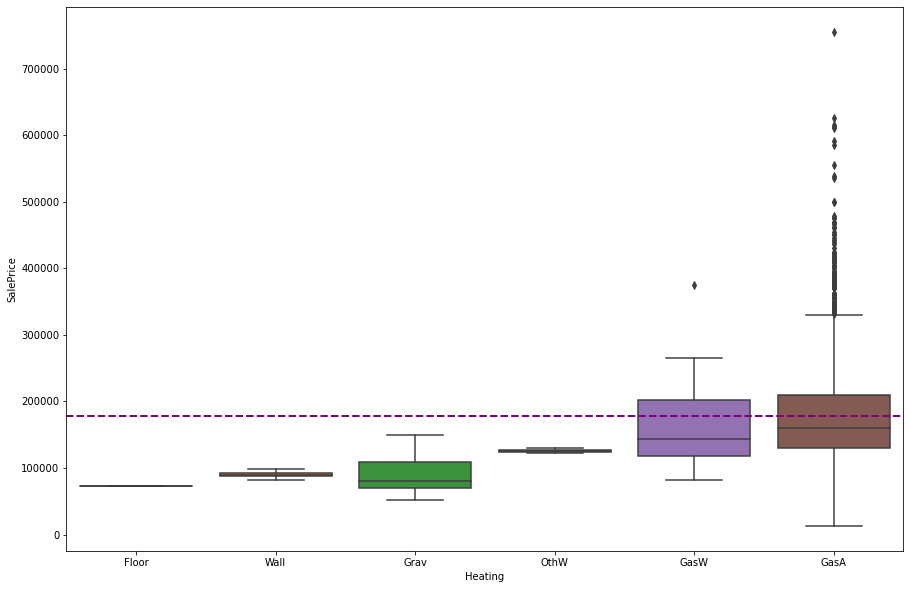

In [115]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Heating')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Heating', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [112]:
housing['HeatingGroups'] = housing.Heating.apply(lambda x:
                                                'gas' if x in ['GasW', 'GasA'] else (
                                                'other' if x in ['Floor', 'Wall', 'Grav', 'OthW'] else
                                                x))

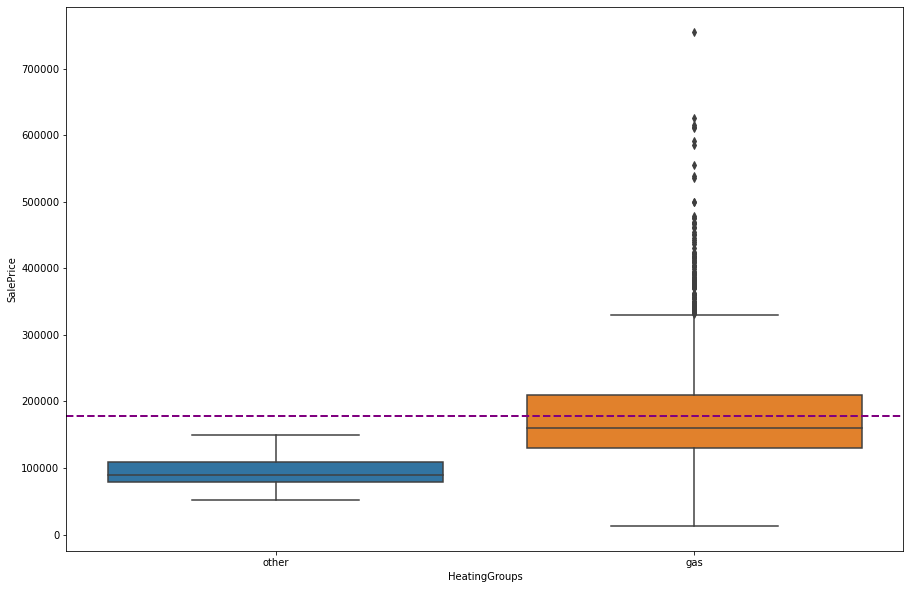

In [113]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('HeatingGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'HeatingGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

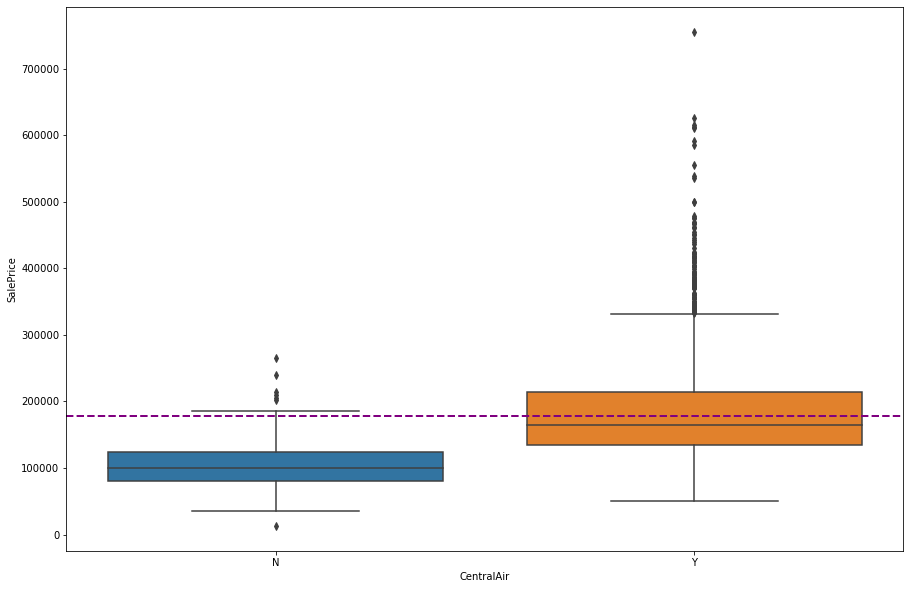

In [116]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('CentralAir')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'CentralAir', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Electrical

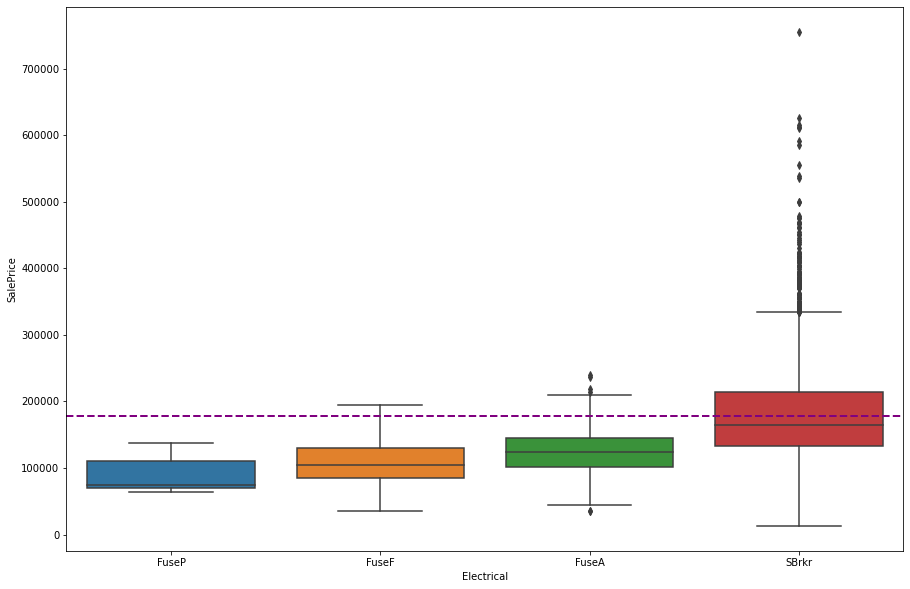

In [117]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Electrical')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Electrical', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [120]:
housing['electricalGroups'] = housing.Electrical.apply(lambda x:
                                                      'fuse' if re.search('Fuse', x) else (
                                                      'breaker' if x in ['SBrkr'] else
                                                      x))

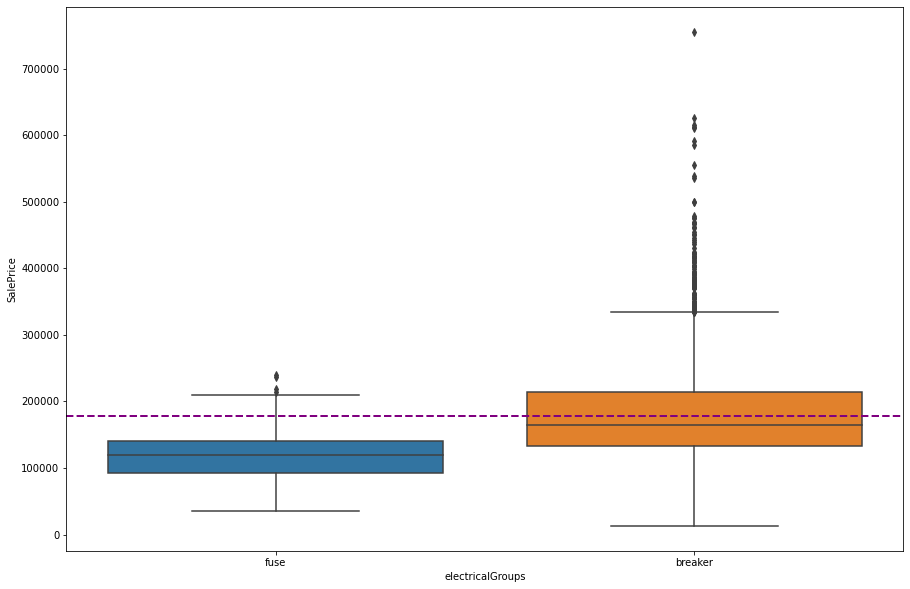

In [121]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('electricalGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'electricalGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Functional

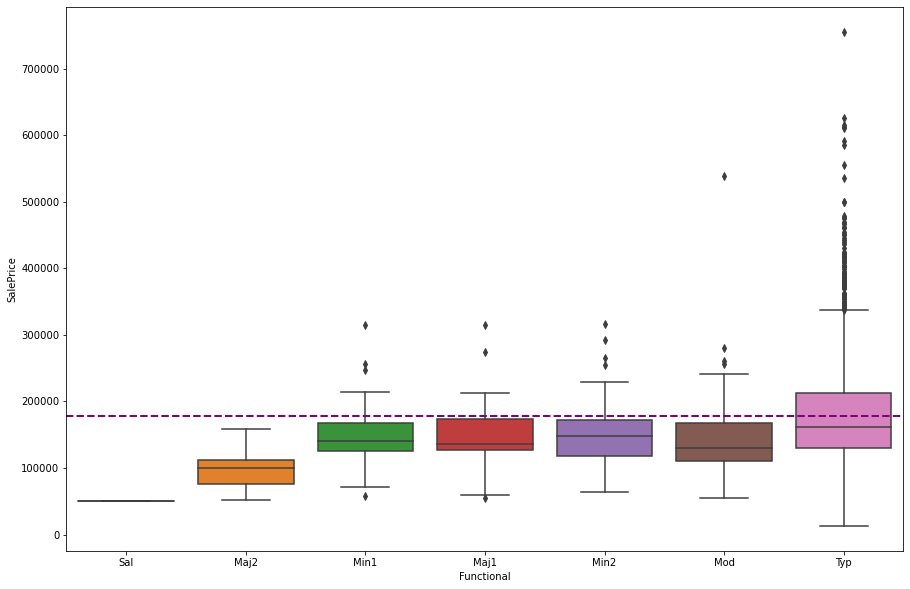

In [122]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Functional')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Functional', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [123]:
housing['functionalGroups'] = housing.Functional.apply(lambda x: 'mid' if x in ['Min1', 'Maj1', 'Min2', 'Mod'] else x)

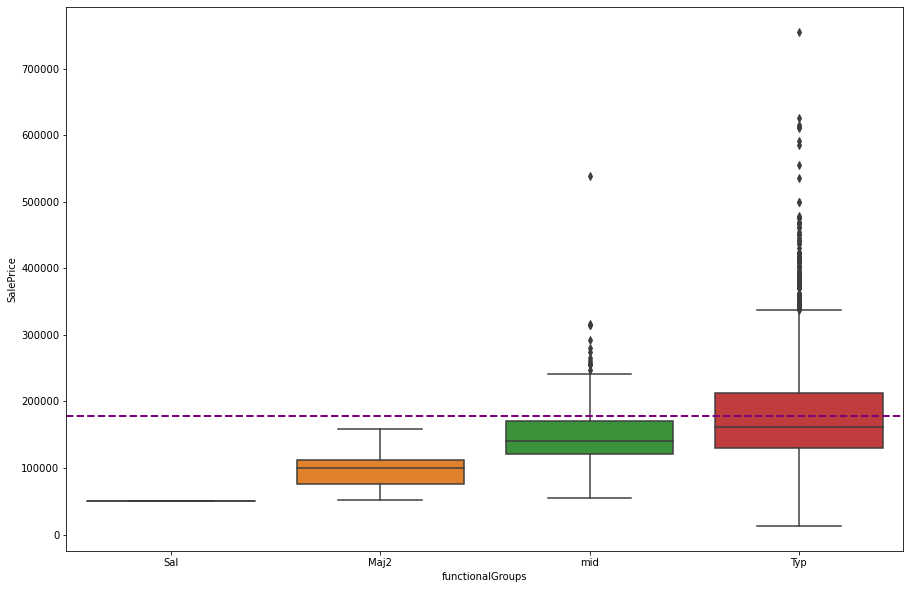

In [124]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('functionalGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'functionalGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Garage categoricals

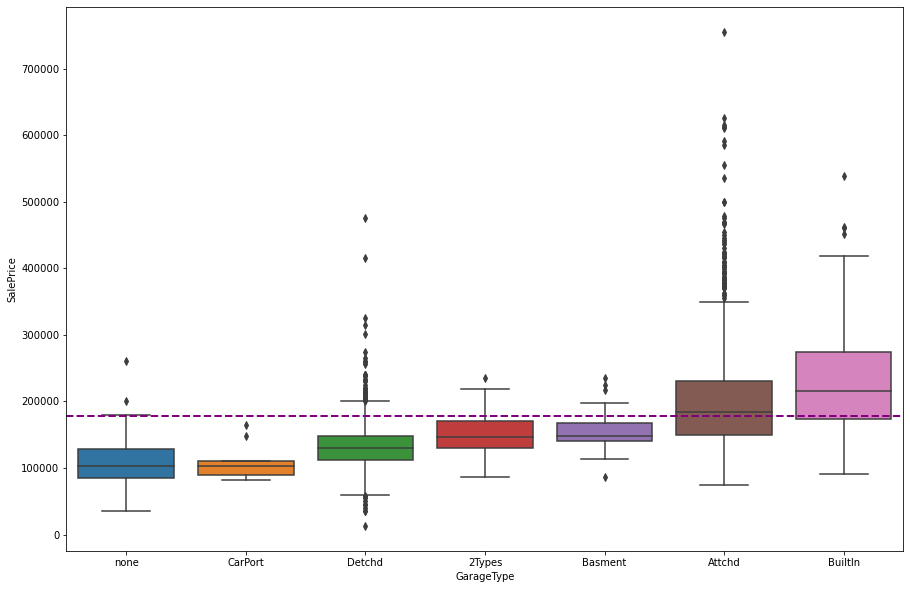

In [125]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('GarageType')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'GarageType', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [126]:
housing['GarageTypeGroups'] = housing.GarageType.apply(lambda x:
                                                      'pos_type' if x in ['Attchd', 'BuiltIn'] else (
                                                      'mid_type' if x in ['Detchd', '2Types', 'Basment'] else (
                                                      'low_type' if x in ['CarPort'] else (
                                                      'none' if x == 'none' else x))))

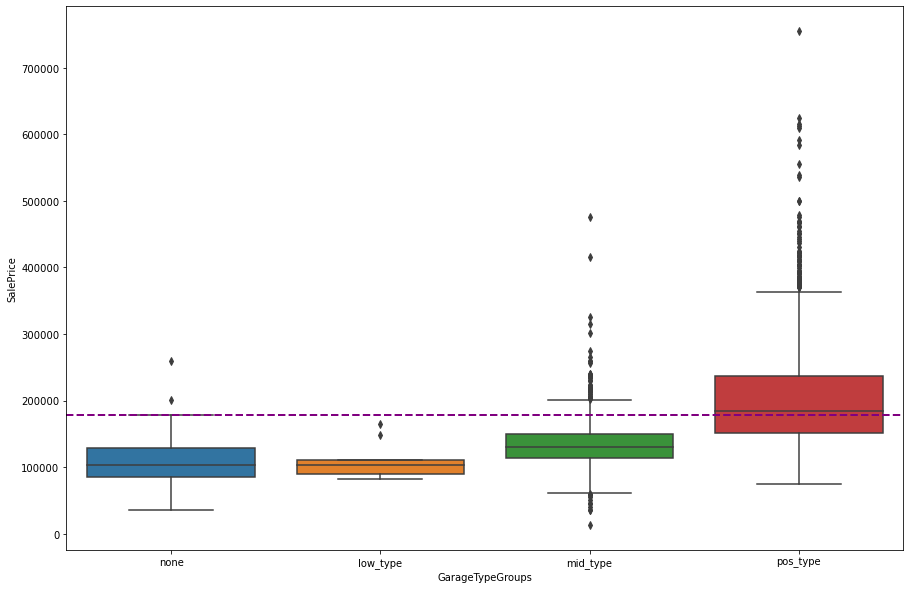

In [127]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('GarageTypeGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'GarageTypeGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

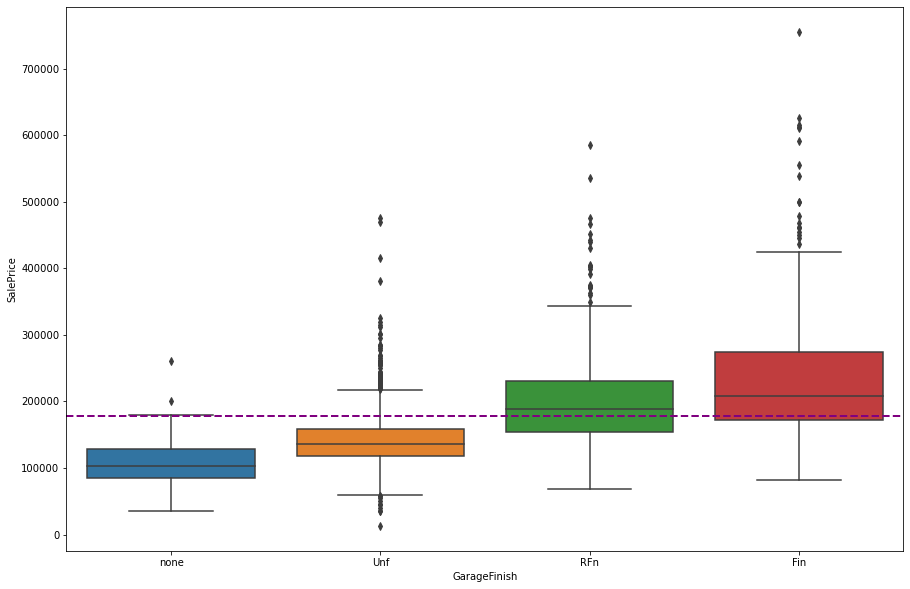

In [128]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('GarageFinish')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'GarageFinish', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Paved Drive

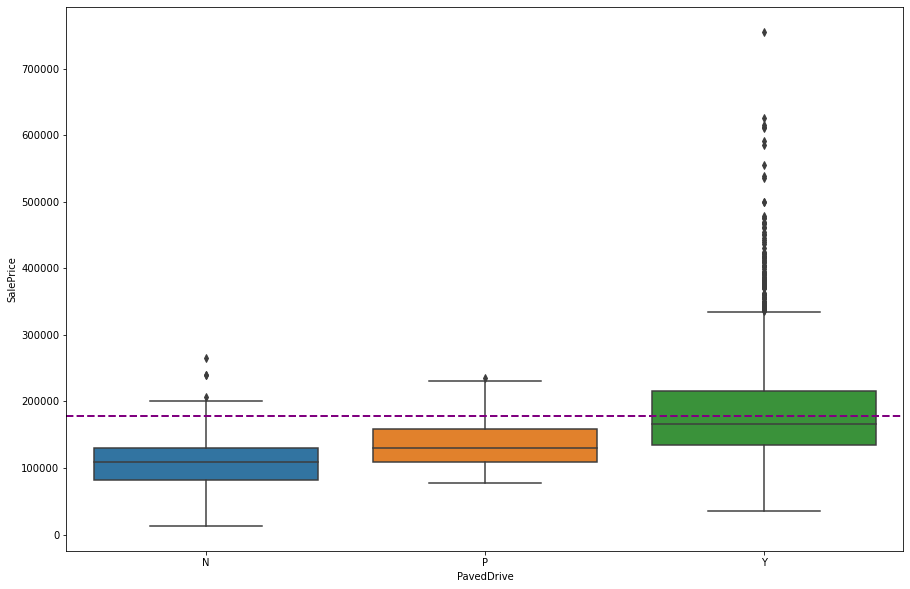

In [129]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('PavedDrive')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'PavedDrive', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Fence

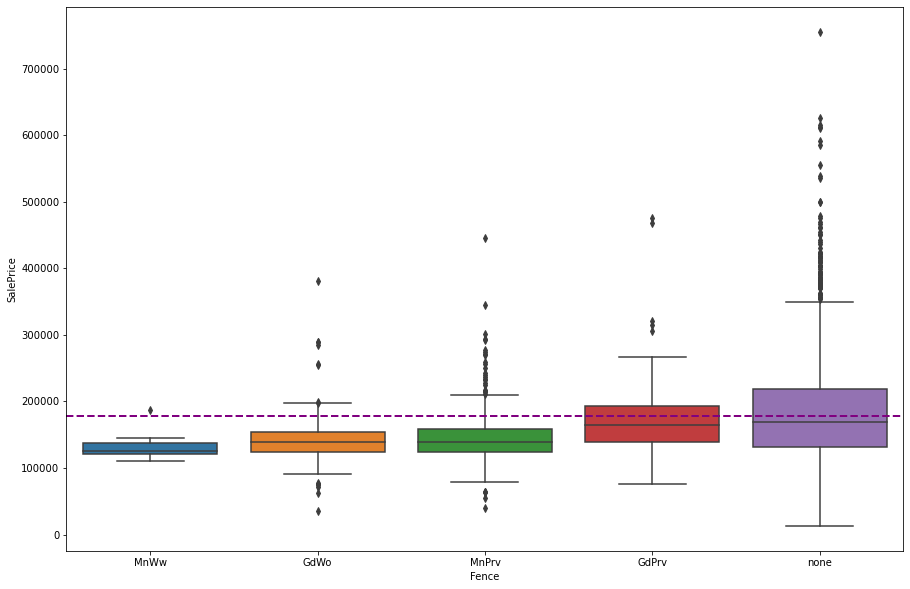

In [130]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Fence')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Fence', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [131]:
housing['fenceGroups'] = housing.Fence.apply(lambda x: 
                                             'neg_fence' if x in ['MnWw', 'GdWo', 'MnPrv'] else (
                                             'pos_fence' if x in ['GdPrv'] else (
                                             'none' if x == 'none' else x)))

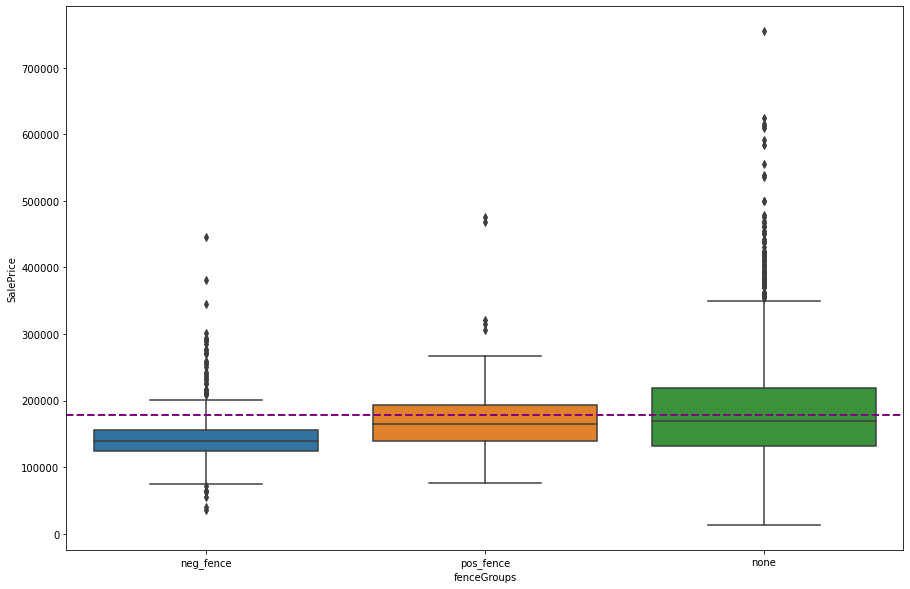

In [132]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('fenceGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'fenceGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## MiscFeature

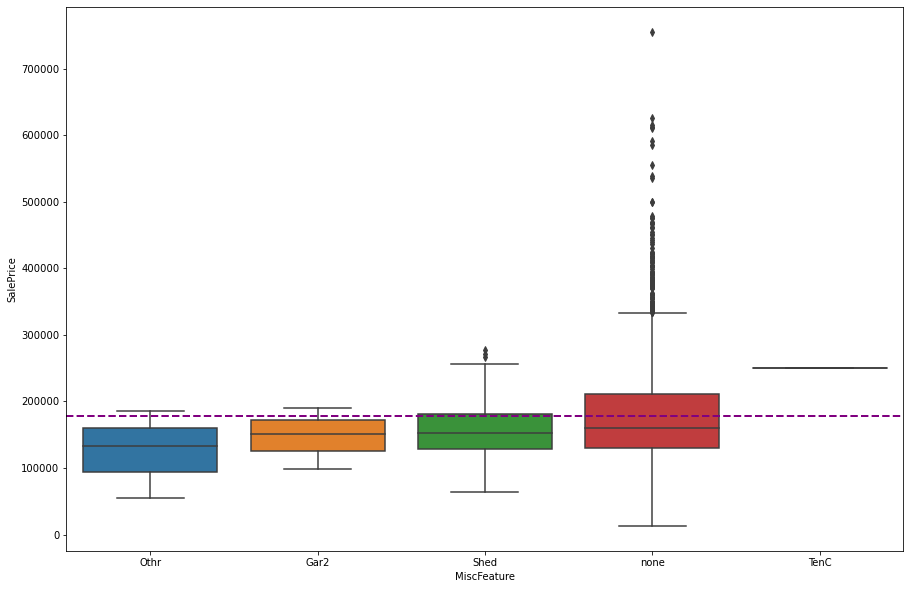

In [133]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('MiscFeature')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'MiscFeature', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [139]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()

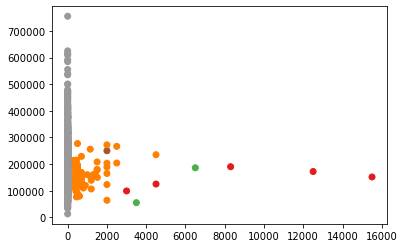

In [143]:
# Already have value info
plt.scatter(x = housing.MiscVal, y = housing.SalePrice, c = enc.fit_transform(housing.MiscFeature.values.reshape(-1,1)), cmap = 'Set1')

Neither particularly predictive, may consider dropping them

## SaleType & Condition

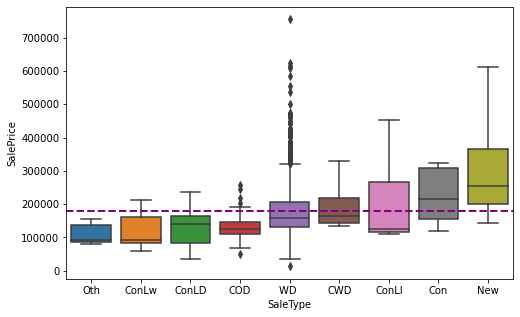

In [81]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('SaleType')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'SaleType', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

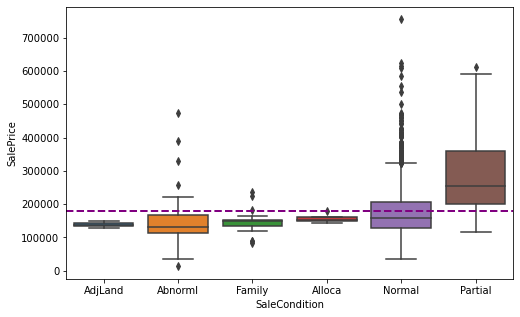

In [79]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('SaleCondition')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'SaleCondition', order = order)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [82]:
housing['SaleCondGroups'] = housing.SaleCondition.apply(lambda x:
                                                       'neg_cond' if x in ['AdjLand', 'Family', 'Alloca']
                                                       else x)

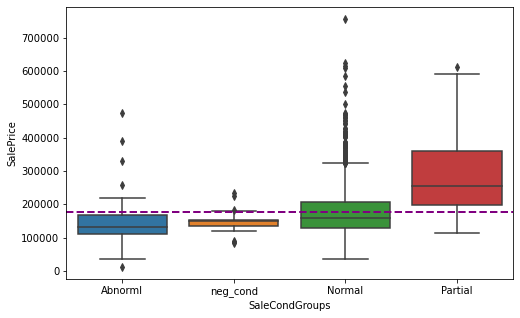

In [83]:
fig,ax = plt.subplots(figsize = (8,5))
order = housing.groupby('SaleCondGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'SaleCondGroups', order = order)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Conditions

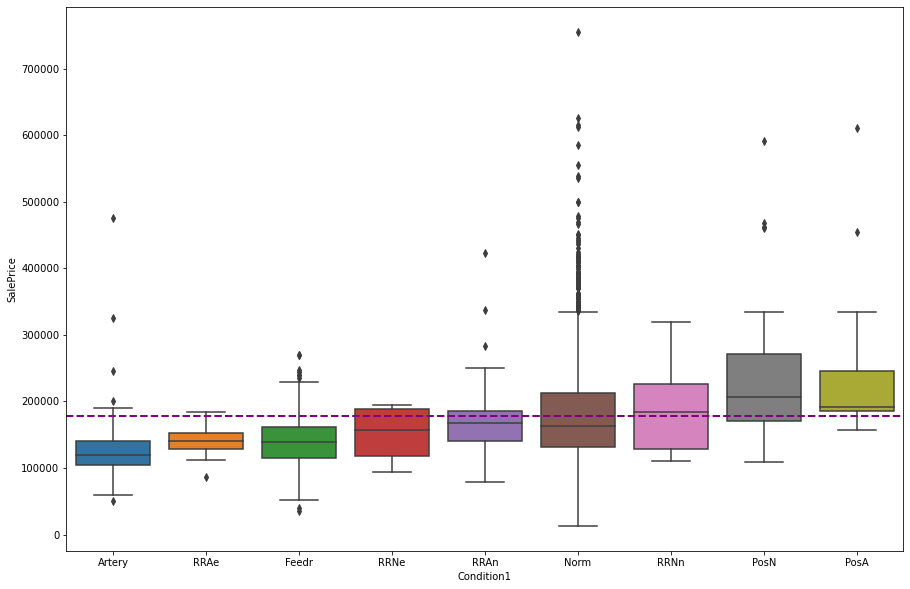

In [64]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Condition1')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Condition1', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

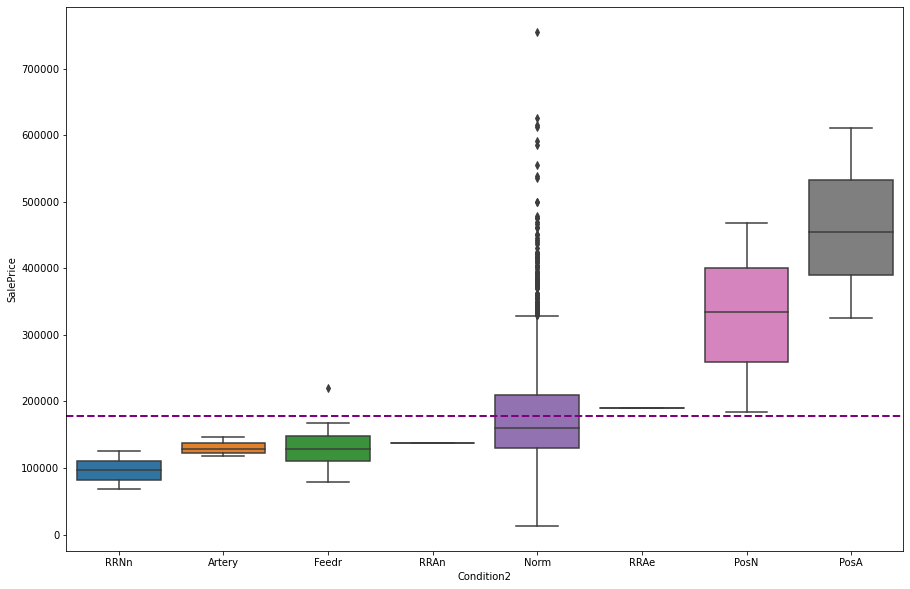

In [68]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('Condition2')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'Condition2', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [69]:
housing['cond1groups'] = housing.Condition1.apply(lambda x: 'neg_cond' if x in ['Artery', 'RRAe', 'Feedr', 'RRNe'] else (
            'normal' if x in ['RRAn', 'Norm', 'RRNn'] else (
            'pos_cond' if x in ['PosN', 'PosA']
            else x)))

housing['cond2groups'] = housing.Condition2.apply(lambda x: 'neg_cond' if x in ['Artery', 'RRAe', 'Feedr', 'RRNe'] else (
            'normal' if x in ['RRAn', 'Norm', 'RRNn'] else (
            'pos_cond' if x in ['PosN', 'PosA']
            else x)))

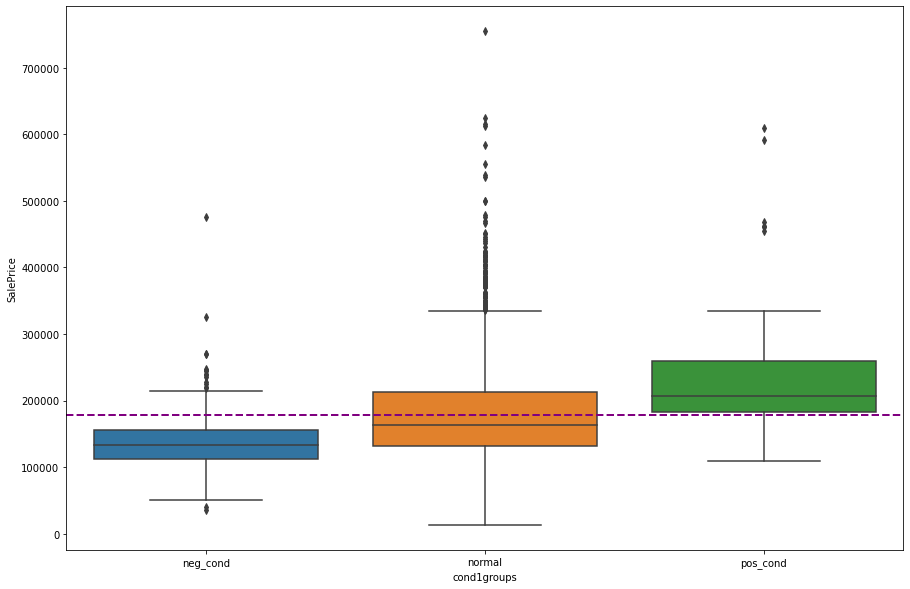

In [70]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('cond1groups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'cond1groups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

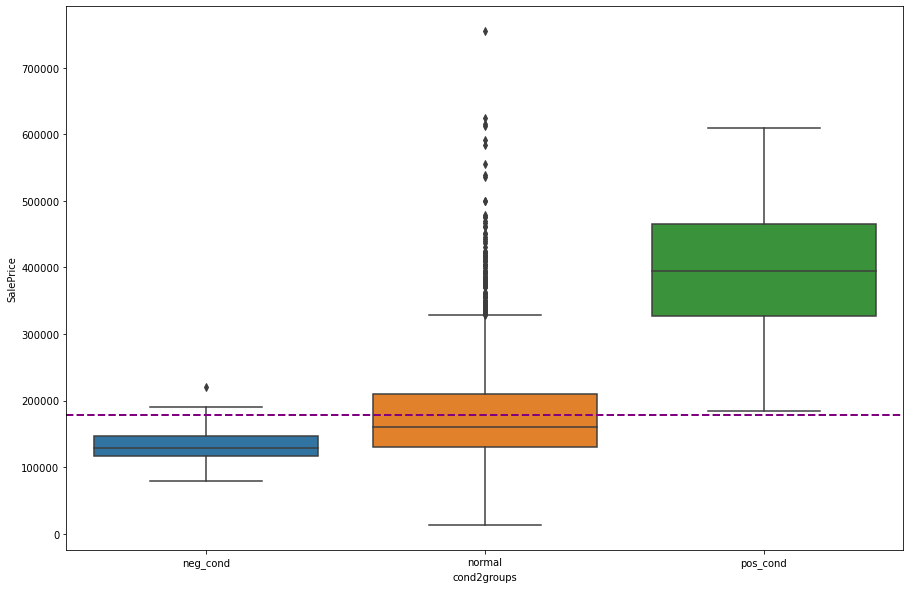

In [71]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('cond2groups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'cond2groups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Overall inspections

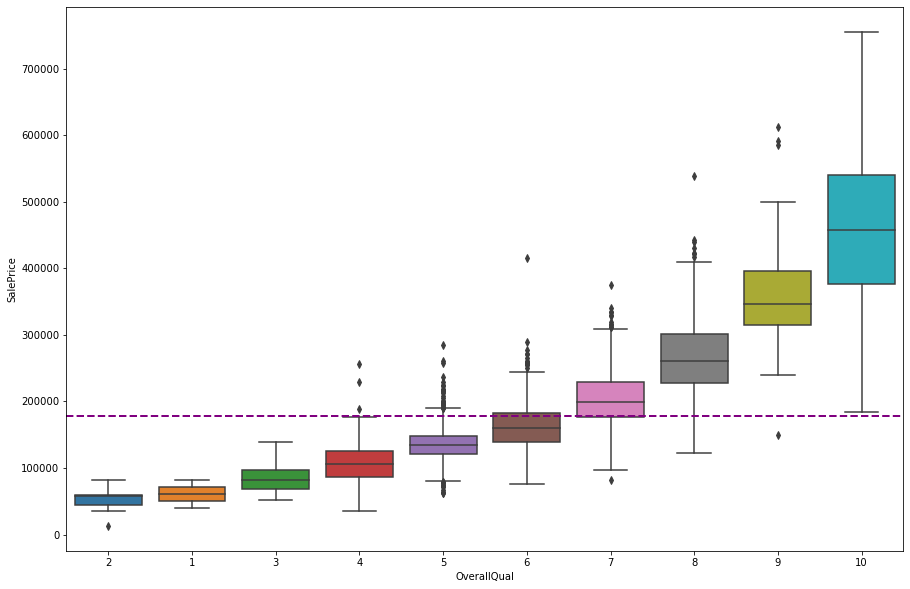

In [144]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('OverallQual')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'OverallQual', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

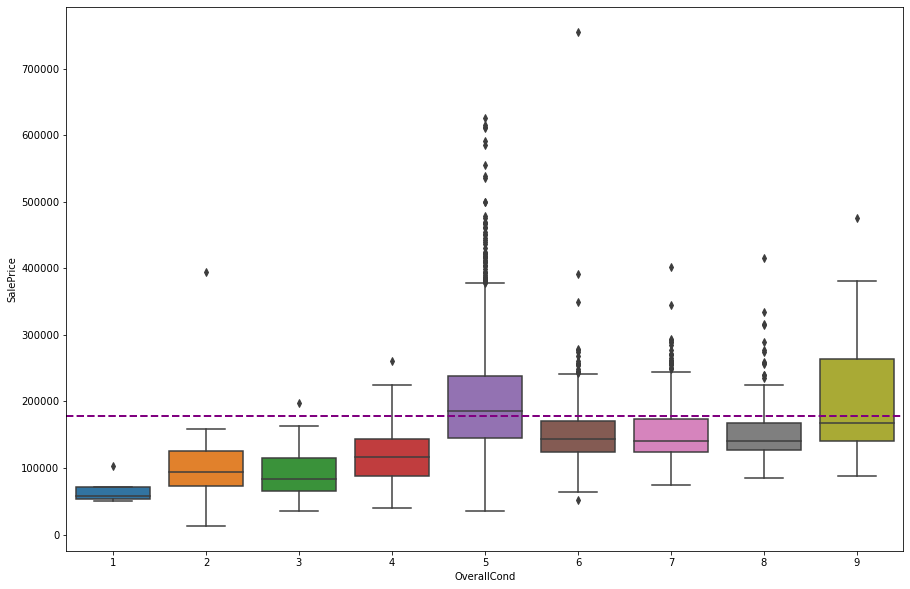

In [147]:
fig,ax = plt.subplots(figsize = (15,10))
sns.boxplot(data = housing, y = 'SalePrice', x = 'OverallCond',  ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

Noisy; should drop.

In [148]:
housing.drop('OverallCond', axis = 1, inplace = True)

## Exterior qual and cond

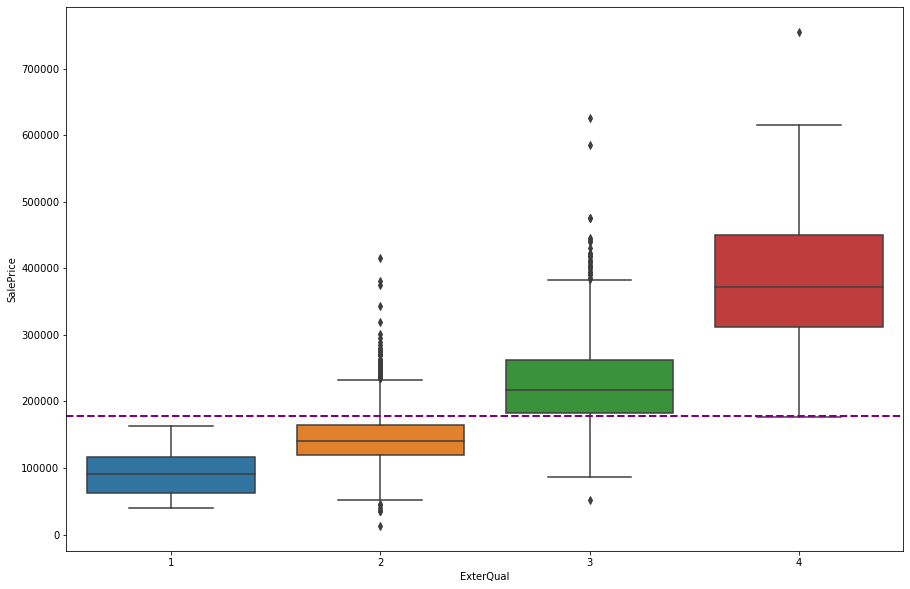

In [149]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('ExterQual')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'ExterQual', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

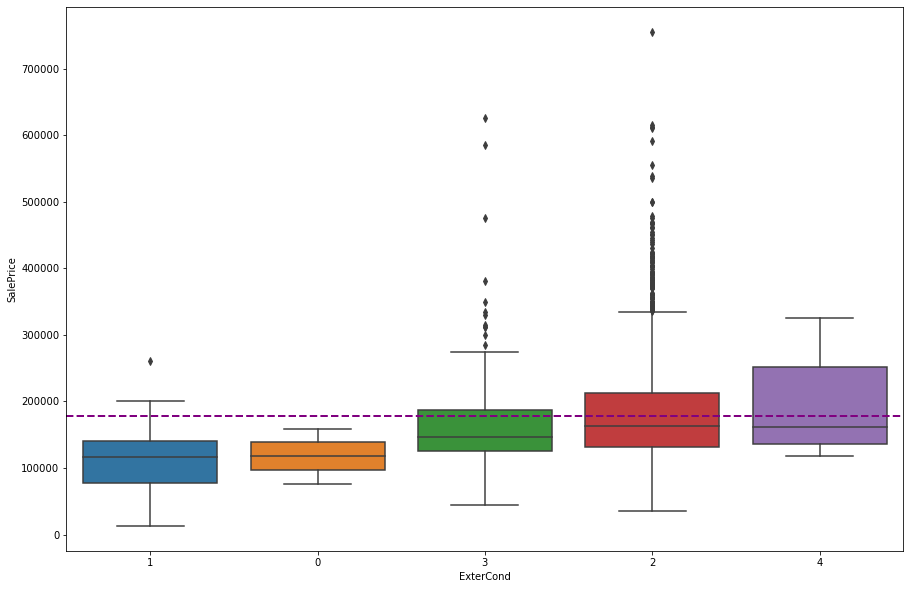

In [151]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('ExterCond')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'ExterCond', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

Quality better predictor; drop condition

In [152]:
housing.drop('ExterCond', axis = 1, inplace = True)

## Heating quality

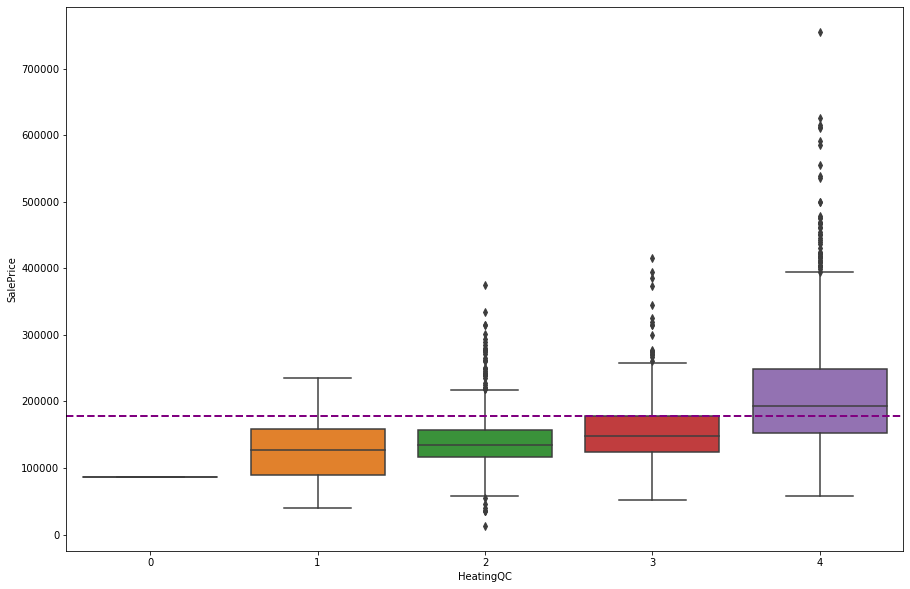

In [154]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('HeatingQC')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'HeatingQC', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

In [157]:
housing['HeatingQCGroups'] = housing.HeatingQC.apply(lambda x:
                                                    'neg_QC' if x in range(4) else(
                                                    'pos_QC' if x in range(4,5) else x))

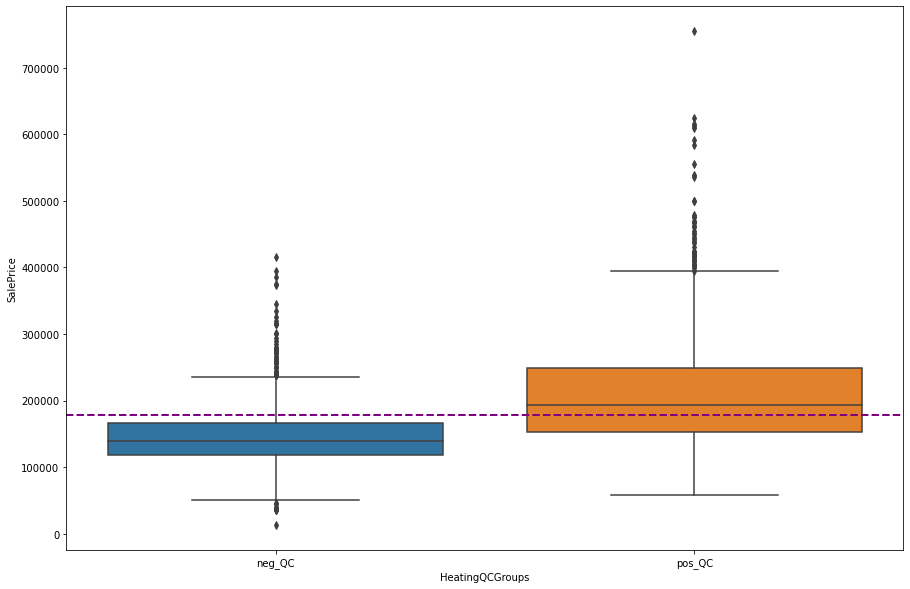

In [158]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('HeatingQCGroups')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'HeatingQCGroups', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)

## Kitchen Quality

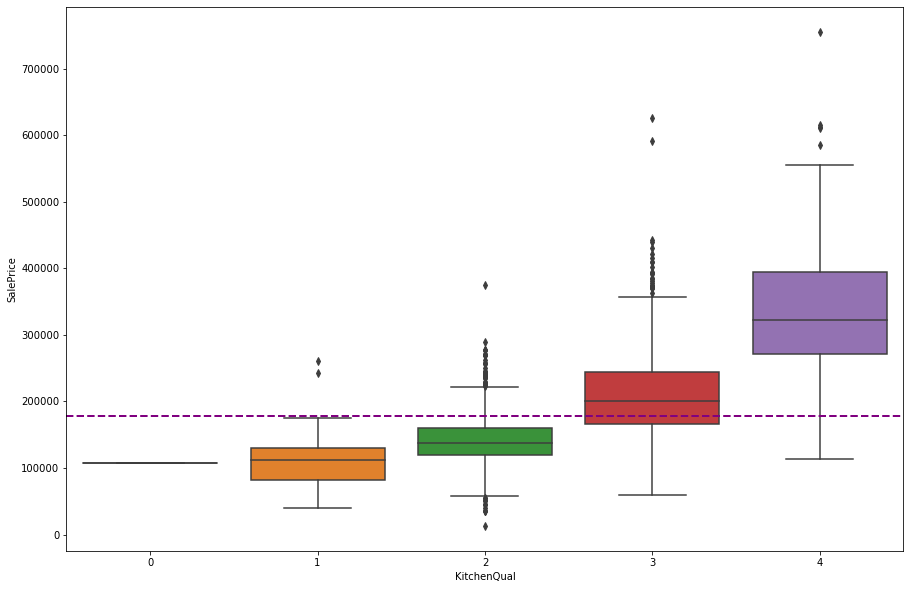

In [159]:
fig,ax = plt.subplots(figsize = (15,10))
order = housing.groupby('KitchenQual')['SalePrice'].mean().sort_values().index
sns.boxplot(data = housing, y = 'SalePrice', x = 'KitchenQual', order = order, ax = ax)
ax.axhline(y = housing.SalePrice.mean(), linestyle = '--', color = 'purple', linewidth = 2)